<a href="https://colab.research.google.com/github/ahmadia89/KYVA_Spring2025/blob/main/notebooks/KYVA_Azure_Prep_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 🔗 Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### 📂 Load KYVA Excel Dataset

In [ ]:
import pandas as pd

file_path = '/content/drive/My Drive/Updated_Dataset_with_MULTIPLE_ATTEMPTS_FLAG_8-5-25.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')
df.head()


,Unnamed: 0.1,Unnamed: 0,SSID,STUDENT_ID,DATE_FOR,CLASSROOM_NAME,ATTENDANCE,Per-Day_TOTAL_LESSONS,SYNCHRONOUS_MINS,ASYNCHRONOUS_MINS,...,FIRST_NAME,LESSONS_LIST,PRIMARY_KEY,MAX_SYNC_MINS_FOR_CLASS,SYNC_UTILIZATION_PCT,MISSED_SYNC_MIN,LESSON_BASE,NON_IEP_DID_MOD_FLAG,IEP_DID_NONMOD_WHEN_MOD_EXISTED_FLAG,MULTIPLE_ATTEMPTS_FLAG
0,0,0,2121236741,5910533,2025-04-30,MTH322B_Consumer Math_Sec 6 b_Sem 2_SY24-25,1,0,24.117,198.900,...,Rafeef,NaN,rafeef_abdulrazzaq_20250430_,45.517,0.529846,21.400,NaN,False,False,True
1,1,1,2121236741,5910533,2025-04-29,MTH322B_Consumer Math_Sec 6 b_Sem 2_SY24-25,1,0,29.233,92.799,...,Rafeef,NaN,rafeef_abdulrazzaq_20250429_,79.783,0.366406,50.550,NaN,False,False,True
2,2,2,2121236741,5910533,2025-04-28,MTH322B_Consumer Math_Sec 6 b_Sem 2_SY24-25,1,1,32.750,95.266,...,Rafeef,5.02 Quiz: Self Check 1,rafeef_abdulrazzaq_20250428_5.02_quiz:_self_ch...,45.150,0.725360,12.400,5.02 quiz: self check 1,False,False,True
3,3,3,2121236741,5910533,2025-04-25,MTH322B_Consumer Math_Sec 6 b_Sem 2_SY24-25,1,0,27.667,125.416,...,Rafeef,NaN,rafeef_abdulrazzaq_20250425_,47.217,0.585954,19.550,NaN,False,False,True
4,4,4,2121236741,5910533,2025-04-24,MTH322B_Consumer Math_Sec 6 b_Sem 2_SY24-25,1,1,22.767,98.367,...,Rafeef,4.05 Unit Test: Other Car Topics,rafeef_abdulrazzaq_20250424_4.05_unit_test:_ot...,31.533,0.722006,8.766,4.05 unit test: other car topics,False,False,False


### 🧹 Clean Data & Create Helper Columns

In [ ]:
# Replace NaNs and ensure types
df['SYNC_UTILIZATION_PCT'] = df['SYNC_UTILIZATION_PCT'].fillna(0)
df['ASYNCHRONOUS_MINS'] = df['ASYNCHRONOUS_MINS'].fillna(0)

# Flags for plotting (keep 0s in full data for regression)
df_plot_sync = df[df['SYNC_UTILIZATION_PCT'] > 0]
df_plot_async = df[df['ASYNCHRONOUS_MINS'] > 0]

# Total Productivity metric
df['TOTAL_PRODUCTIVITY'] = df['SYNC_UTILIZATION_PCT'] + df['ASYNCHRONOUS_MINS']

# Binary column for Resource Teacher Presence (0 = Period 5)
df['RESOURCE_PRESENT'] = df['CLASSROOM_NAME'].apply(lambda x: 0 if '5' in str(x) else 1)

df.head()


,Unnamed: 0.1,Unnamed: 0,SSID,STUDENT_ID,DATE_FOR,CLASSROOM_NAME,ATTENDANCE,Per-Day_TOTAL_LESSONS,SYNCHRONOUS_MINS,ASYNCHRONOUS_MINS,...,PRIMARY_KEY,MAX_SYNC_MINS_FOR_CLASS,SYNC_UTILIZATION_PCT,MISSED_SYNC_MIN,LESSON_BASE,NON_IEP_DID_MOD_FLAG,IEP_DID_NONMOD_WHEN_MOD_EXISTED_FLAG,MULTIPLE_ATTEMPTS_FLAG,TOTAL_PRODUCTIVITY,RESOURCE_PRESENT
0,0,0,2121236741,5910533,2025-04-30,MTH322B_Consumer Math_Sec 6 b_Sem 2_SY24-25,1,0,24.117,198.900,...,rafeef_abdulrazzaq_20250430_,45.517,0.529846,21.400,NaN,False,False,True,199.429846,0
1,1,1,2121236741,5910533,2025-04-29,MTH322B_Consumer Math_Sec 6 b_Sem 2_SY24-25,1,0,29.233,92.799,...,rafeef_abdulrazzaq_20250429_,79.783,0.366406,50.550,NaN,False,False,True,93.165406,0
2,2,2,2121236741,5910533,2025-04-28,MTH322B_Consumer Math_Sec 6 b_Sem 2_SY24-25,1,1,32.750,95.266,...,rafeef_abdulrazzaq_20250428_5.02_quiz:_self_ch...,45.150,0.725360,12.400,5.02 quiz: self check 1,False,False,True,95.991360,0
3,3,3,2121236741,5910533,2025-04-25,MTH322B_Consumer Math_Sec 6 b_Sem 2_SY24-25,1,0,27.667,125.416,...,rafeef_abdulrazzaq_20250425_,47.217,0.585954,19.550,NaN,False,False,True,126.001954,0
4,4,4,2121236741,5910533,2025-04-24,MTH322B_Consumer Math_Sec 6 b_Sem 2_SY24-25,1,1,22.767,98.367,...,rafeef_abdulrazzaq_20250424_4.05_unit_test:_ot...,31.533,0.722006,8.766,4.05 unit test: other car topics,False,False,False,99.089006,0


\### 📊 Visualize Sync/Async Distributions

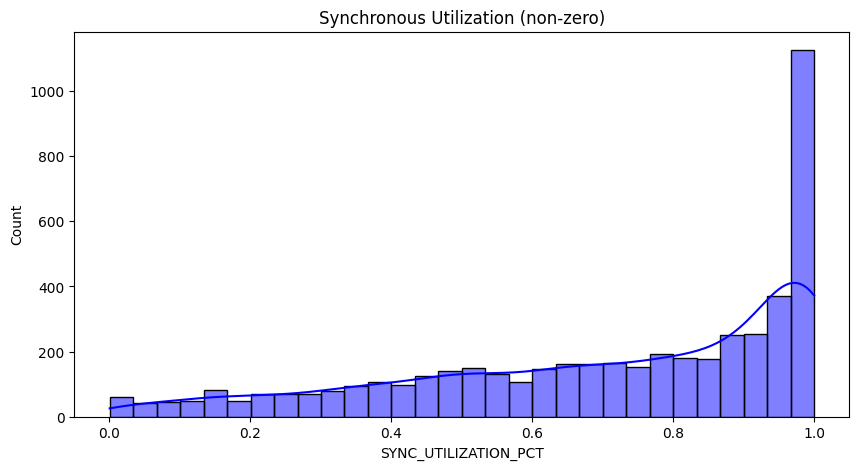

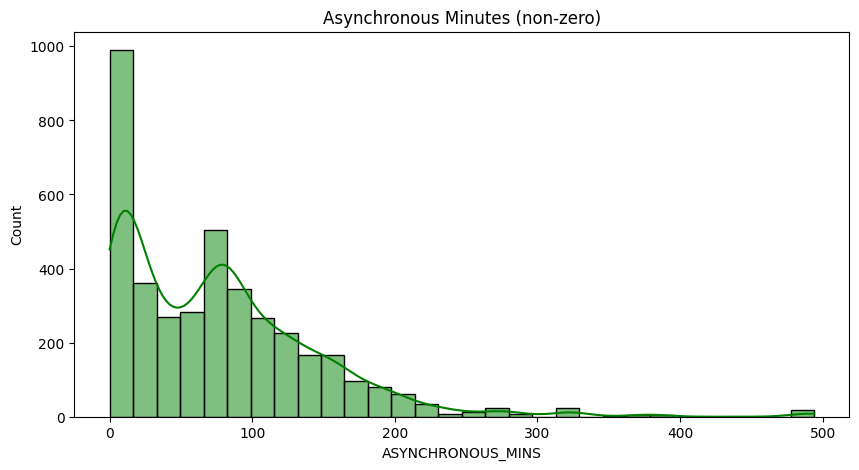

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Synchronous Utilization
plt.figure(figsize=(10,5))
sns.histplot(df_plot_sync['SYNC_UTILIZATION_PCT'], bins=30, kde=True, color='blue')
plt.title("Synchronous Utilization (non-zero)")
plt.show()

# Asynchronous Minutes
plt.figure(figsize=(10,5))
sns.histplot(df_plot_async['ASYNCHRONOUS_MINS'], bins=30, kde=True, color='green')
plt.title("Asynchronous Minutes (non-zero)")
plt.show()


### 📈 Panel Regression Prep

In [ ]:
# Convert date if needed
df['DATE_FOR'] = pd.to_datetime(df['DATE_FOR'], errors='coerce')
df['WEEK'] = df['DATE_FOR'].dt.isocalendar().week

# Create panel key columns
df['STUDENT_ID'] = df['STUDENT_ID'].astype(str)
panel_data = df[['STUDENT_ID', 'WEEK', 'TOTAL_PRODUCTIVITY', 'SYNC_UTILIZATION_PCT', 'ASYNCHRONOUS_MINS', 'RESOURCE_PRESENT', 'IEP_STATUS']]
panel_data = panel_data.dropna()

panel_data.head()


,STUDENT_ID,WEEK,TOTAL_PRODUCTIVITY,SYNC_UTILIZATION_PCT,ASYNCHRONOUS_MINS,RESOURCE_PRESENT,IEP_STATUS
0,5910533,18,199.429846,0.529846,198.900,0,0
1,5910533,18,93.165406,0.366406,92.799,0,0
2,5910533,18,95.991360,0.725360,95.266,0,0
3,5910533,17,126.001954,0.585954,125.416,0,0
4,5910533,17,99.089006,0.722006,98.367,0,0


### 💾 Export to CSV, JSON, and Parquet

In [ ]:
csv_path = '/content/KYVA_CLEANED.csv'
json_path = '/content/KYVA_CLEANED.json'
parquet_path = '/content/KYVA_CLEANED.parquet'

panel_data.to_csv(csv_path, index=False)
panel_data.to_json(json_path, orient='records', lines=True)
panel_data.to_parquet(parquet_path, index=False)

print("Files exported and ready to upload to Azure or Tableau.")


Files exported and ready to upload to Azure or Tableau.


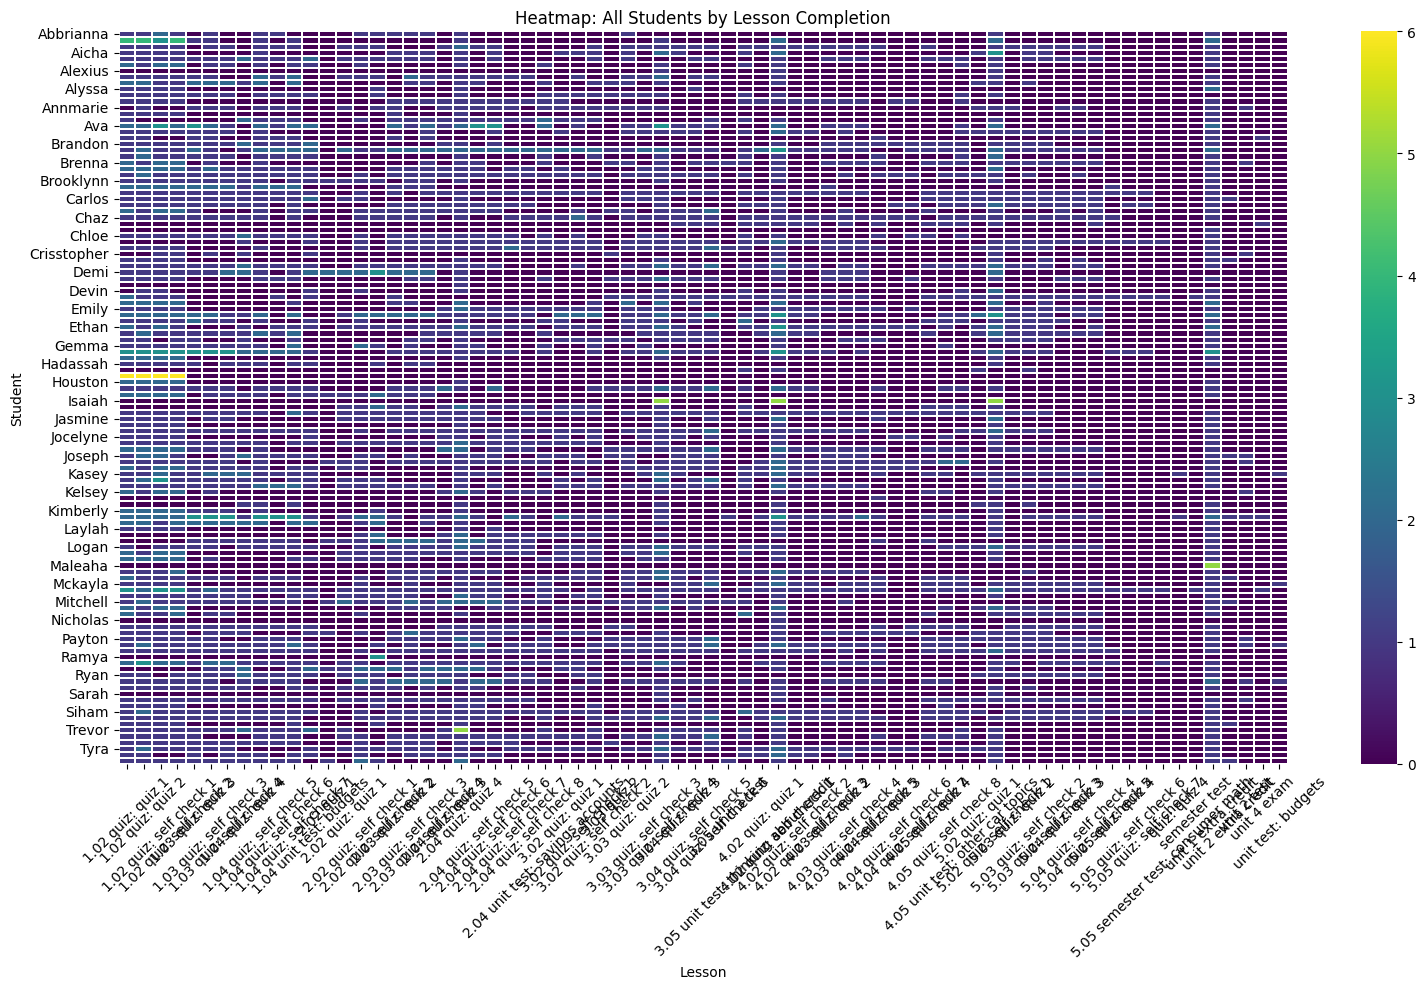

In [ ]:
pivot = pd.pivot_table(
    df,
    index='FIRST_NAME',
    columns='LESSON_BASE',
    values='LESSON_DONE_BOOL',
    aggfunc='sum'
)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.heatmap(pivot.fillna(0), cmap='viridis', linewidths=0.1)
plt.title("Heatmap: All Students by Lesson Completion")
plt.xlabel("Lesson")
plt.ylabel("Student")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


✅ Upload these files to Azure Blob Storage or Synapse Analytics for ingestion into ADF workflows.